In [3]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from collections import Counter

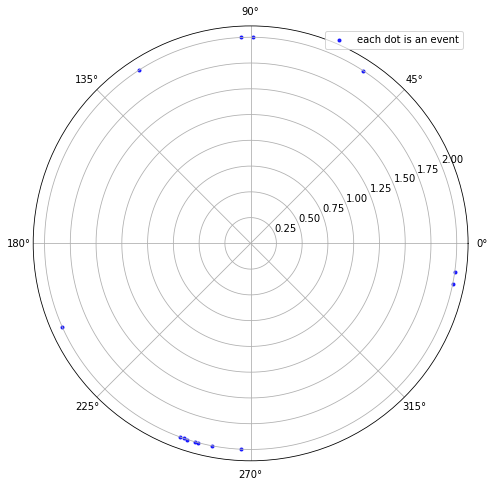

In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [19]:

def gen_dict():
    count_dict = {}
    categories = ['News & Politics & Society','Living & Well-being','Adult & Sensitive & Illegal','Health & Fitness','Arts & Entertainment','Finance & Business','Jobs & Education','neutral','Science & Tech.',"Sports"]
    for category in categories:
        timeCounts = {}
        for hour in range(0,24):
            timeCounts[hour] = 0
        count_dict[category] = timeCounts
    return count_dict   

#Gets weekly distribution for top ten terms- wrapper function

def replace_cat(df):
    merged_categories = {'Adult' : 'Adult & Sensitive & Illegal',
     'American Cuisine' : 'Living & Well-being',
     'American Football' : 'Sports',
     'Arts & Entertainment' : 'Arts & Entertainment',
     'Automotive' : 'Science & Tech.',
     'Autos & Vehicles' : 'Science & Tech.',
     'Basketball' : 'Sports',
     'Beauty & Fitness' : 'Health & Fitness',
     'Books & Literature' : 'Arts & Entertainment',
     'Business' : 'Finance & Business',
     'Business & Industrial' : 'Finance & Business',
     'Buying' : 'Living & Well-being',
     'Careers' : 'Jobs & Education',
     'Comedy' : 'Arts & Entertainment',
     'Computers & Electronics' : 'Science & Tech.',
     'Content Server' : 'neutral',
     'Couponing' : 'Living & Well-being',
     'Desserts & Baking' : 'Living & Well-being',
     'Education' : 'Jobs & Education',
     'English as a 2nd Language' : 'Jobs & Education',
     'Entertainment' : 'Arts & Entertainment',
     'Family & Parenting' : 'Living & Well-being',
     'Film & Animation' : 'Arts & Entertainment',
     'Finance' : 'Finance & Business',
     'Food & Drink' : 'Living & Well-being',
     'Games' : 'Arts & Entertainment',
     'Gaming' : 'Arts & Entertainment',
     'Health' : 'Health & Fitness',
     'Health & Fitness' : 'Health & Fitness',
     'Hobbies & Interests' : 'Living & Well-being',
     'Hobbies & Leisure' : 'Living & Well-being',
     'Home & Garden' : 'Living & Well-being',
     'Howto & Style' : 'Living & Well-being',
     'Humor' : 'Arts & Entertainment',
     'Illegal Content' : 'Adult & Sensitive & Illegal',
     'Internet & Telecom' : 'Science & Tech.',
     'Jobs & Education' : 'Jobs & Education',
     'Law & Government' : 'News & Politics & Society',
     'Law, Government, & Politics' : 'News & Politics & Society',
     'Mac Support' : 'Science & Tech.',
     'Movies' : 'Arts & Entertainment',
     'Music' : 'Arts & Entertainment',
     'News' : 'News & Politics & Society',
     'News & Politics' : 'News & Politics & Society',
     'Non-Standard Content' : 'Adult & Sensitive & Illegal',
     'Nonprofits & Activism' : 'News & Politics & Society',
     'Online Communities' : 'Living & Well-being',
     'PC Support' : 'Science & Tech.',
     'People & Blogs' : 'News & Politics & Society',
     'People & Society' : 'News & Politics & Society',
     'Personal Finance' : 'Finance & Business',
     'Pets' : 'Living & Well-being',
     'Pets & Animals' : 'Living & Well-being',
     'Politics' : 'News & Politics & Society',
     'Real Estate' : 'Finance & Business',
     'Reference' : 'Jobs & Education',
     'Religion & Spirituality' : 'Health & Fitness',
     'Science' : 'Science & Tech.',
     'Science & Technology' : 'Science & Tech.',
     'Sensitive Subjects' : 'Adult & Sensitive & Illegal',
     'Shopping' : 'Living & Well-being',
     'Society' : 'News & Politics & Society',
     'Sports' : 'Sports',
     'Style & Fashion' : 'Living & Well-being',
     'Technology & Computing' : 'Science & Tech.',
     'Television & Video' : 'Arts & Entertainment',
     'Tennis' : 'Sports',
     'Travel' : 'Living & Well-being',
     'Travel & Events' : 'Living & Well-being',
     'Uncategorized' : 'neutral',
     'Unmoderated UGC' : 'neutral',
     'Web Design' : 'Science & Tech.',
     'Web Search' : 'neutral'}
    df["all_categories"] = df["all_categories"].apply(lambda x: merged_categories[x])
    return df


def populate_dict(df,count_dict):
    for category in count_dict.keys():
        for hour in range(0,24):
            df_hour_cat_count = df[(df['all_categories'] == category) &(df['hours'] == hour)].shape[0]
            count_dict[category][hour] = df_hour_cat_count
    return count_dict


    

In [25]:
def main():
    DATA = '/Users/michaelgiardino/Desktop/summer2020/research/mike-work-space/new_data/8_41.csv'
    df = pd.read_csv(DATA).dropna(subset=["all_categories"])
    df = replace_cat(df)
    count_dict = gen_dict()
    count_dict = populate_dict(df,count_dict)
    print(count_dict)
main()

{'News & Politics & Society': {0: 11, 1: 10, 2: 13, 3: 3, 4: 0, 5: 5, 6: 1, 7: 0, 8: 1, 9: 8, 10: 9, 11: 22, 12: 28, 13: 12, 14: 17, 15: 12, 16: 8, 17: 20, 18: 4, 19: 15, 20: 6, 21: 23, 22: 9, 23: 22}, 'Living & Well-being': {0: 48, 1: 16, 2: 13, 3: 39, 4: 5, 5: 5, 6: 4, 7: 3, 8: 1, 9: 15, 10: 54, 11: 69, 12: 28, 13: 40, 14: 36, 15: 26, 16: 19, 17: 26, 18: 38, 19: 42, 20: 25, 21: 35, 22: 36, 23: 39}, 'Adult & Sensitive & Illegal': {0: 0, 1: 3, 2: 0, 3: 1, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 4, 12: 4, 13: 0, 14: 3, 15: 1, 16: 2, 17: 1, 18: 2, 19: 1, 20: 1, 21: 6, 22: 4, 23: 1}, 'Health & Fitness': {0: 4, 1: 4, 2: 5, 3: 2, 4: 0, 5: 2, 6: 0, 7: 0, 8: 0, 9: 4, 10: 7, 11: 20, 12: 13, 13: 0, 14: 9, 15: 5, 16: 4, 17: 5, 18: 8, 19: 8, 20: 17, 21: 6, 22: 9, 23: 7}, 'Arts & Entertainment': {0: 26, 1: 29, 2: 2, 3: 3, 4: 2, 5: 1, 6: 5, 7: 2, 8: 0, 9: 14, 10: 41, 11: 44, 12: 42, 13: 30, 14: 16, 15: 24, 16: 19, 17: 16, 18: 7, 19: 20, 20: 27, 21: 15, 22: 33, 23: 30}, 'Finance & Business': 

[94.24777960769379]


ValueError: x and y must be the same size

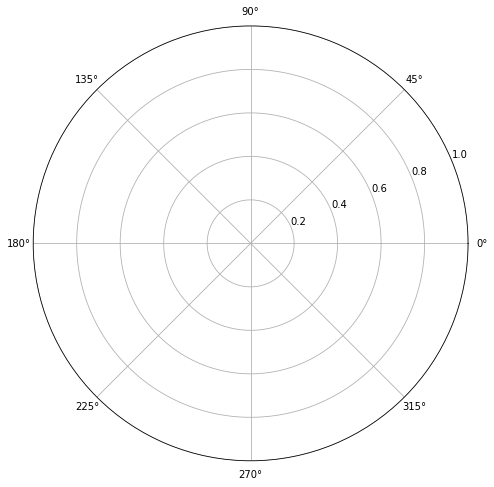

In [32]:
np.random.seed(19680801)
# data points
N = 100
# fixed radius of the points, here its 2
r1 = [2 for i in range(N)] #2 * np.random.rand(N)
# these are for the hour map to degree radians
angles = [15,30,45,60,75,90]
theta1 = [2 * np.pi * (360/24)]
print(theta1)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='polar')
c = ax.scatter(theta1, r1, marker='.',c='blue', cmap='hsv', alpha=0.85,label='each dot is an event')
plt.legend()